In [14]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [15]:
df = pd.read_csv('data/listings.csv', encoding='utf-8')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,105.0,63,148,2023-05-25,0.81,1,272,0,First name and Last name: Nicolas Krotz <br/> ...
1,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180.0,6,7,2020-01-04,0.06,1,32,0,03/Z/RA/003410-18
2,14325,Studio Apartment in Prenzlauer Berg,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.54813,13.40366,Entire home/apt,70.0,150,26,2023-11-30,0.15,4,185,1,NaN
3,16644,In the Heart of Berlin - Kreuzberg,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.50312,13.43508,Entire home/apt,90.0,93,48,2017-12-14,0.28,2,0,0,NaN
4,17904,Beautiful Kreuzberg studio - 3 months minimum,68997,Matthias,Neukölln,Reuterstraße,52.49419,13.42166,Entire home/apt,25.0,92,299,2022-12-01,1.71,1,1,0,NaN


# Очистка данных

In [16]:
# Основные операции по очистке данных:

# Удаление переменных
# one-hot кодирование
# Удаление пропущенных значений
# Уменьшение размерности

In [17]:
del df['latitude']
del df['longitude']

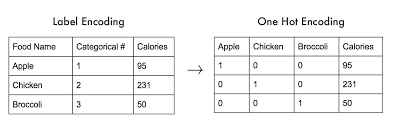

In [18]:
df = pd.get_dummies(df,columns=['neighbourhood_group','neighbourhood'])

df.head()

,id,name,host_id,host_name,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,...,neighbourhood_West 3,neighbourhood_West 4,neighbourhood_West 5,neighbourhood_Westend,neighbourhood_Wiesbadener Straße,neighbourhood_Wilhelmstadt,neighbourhood_Zehlendorf Nord,neighbourhood_Zehlendorf Südwest,neighbourhood_nördliche Luisenstadt,neighbourhood_südliche Luisenstadt
0,3176,Fabulous Flat in great Location,3718,Britta,Entire home/apt,105.0,63,148,2023-05-25,0.81,...,False,False,False,False,False,False,False,False,False,False
1,9991,Geourgeous flat - outstanding views,33852,Philipp,Entire home/apt,180.0,6,7,2020-01-04,0.06,...,False,False,False,False,False,False,False,False,False,False
2,14325,Studio Apartment in Prenzlauer Berg,55531,Chris + Oliver,Entire home/apt,70.0,150,26,2023-11-30,0.15,...,False,False,False,False,False,False,False,False,False,False
3,16644,In the Heart of Berlin - Kreuzberg,64696,Rene,Entire home/apt,90.0,93,48,2017-12-14,0.28,...,False,False,False,False,False,False,False,False,True,False
4,17904,Beautiful Kreuzberg studio - 3 months minimum,68997,Matthias,Entire home/apt,25.0,92,299,2022-12-01,1.71,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# Удаление столбцов с информацией, вытекающий из других столбцов методом исключения
# Например, в случае с Марико интерпретатор Python может сделать вывод о том, что объект из Токио, 
# на основании ложных аргументов city_london и city_mumbai. 
# В статистике это понятие известно как мультиколлинеарность 
# и описывает возможность предсказать переменную на основе значений других переменных.

# Мы можем добавить параметр drop_first=True, который удаляет первый столбец для каждой переменной.

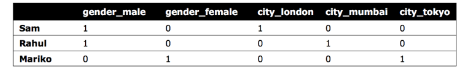 --> 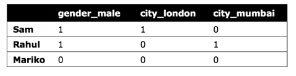

In [20]:
# df = pd.get_dummies(df, columns = ['neighbourhood_group', 'neighbourhood'], drop_first = True)

# Удаление пропущенных значений

In [20]:
combs = [[1] * 5 for _ in range(4)]
for i in range(1, 4):
    for j in range(5):
        combs[i][j] = sum(combs[i-1][:j+1])
print(sum(combs[-1]))

70
